In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv(open('nics-firearm-background-checks.csv'))
df.shape

(12540, 27)

In [3]:
def extract_year (input):
    return int(input.split('-')[0])

df['year'] = df['month'].apply(extract_year)

In [4]:
def create_dataframe(df, year, column):
    temp_df = df[df['year'] == year]
    state_count = {}
    for i, row in temp_df.iterrows():
        if row['state'] in state_count:
            state_count[row['state']] += int(row[column])
        else:
            state_count[row['state']] = int(row[column])
    new_df = pd.DataFrame([state_count])
    new_df = new_df.transpose()
    return new_df

In [5]:
df_2016_total = create_dataframe(df, 2016, 'totals')
df_2016_total.columns = ['total_background_checks']
df_2016_total_sorted = df_2016_total.sort_values('total_background_checks')[::-1]

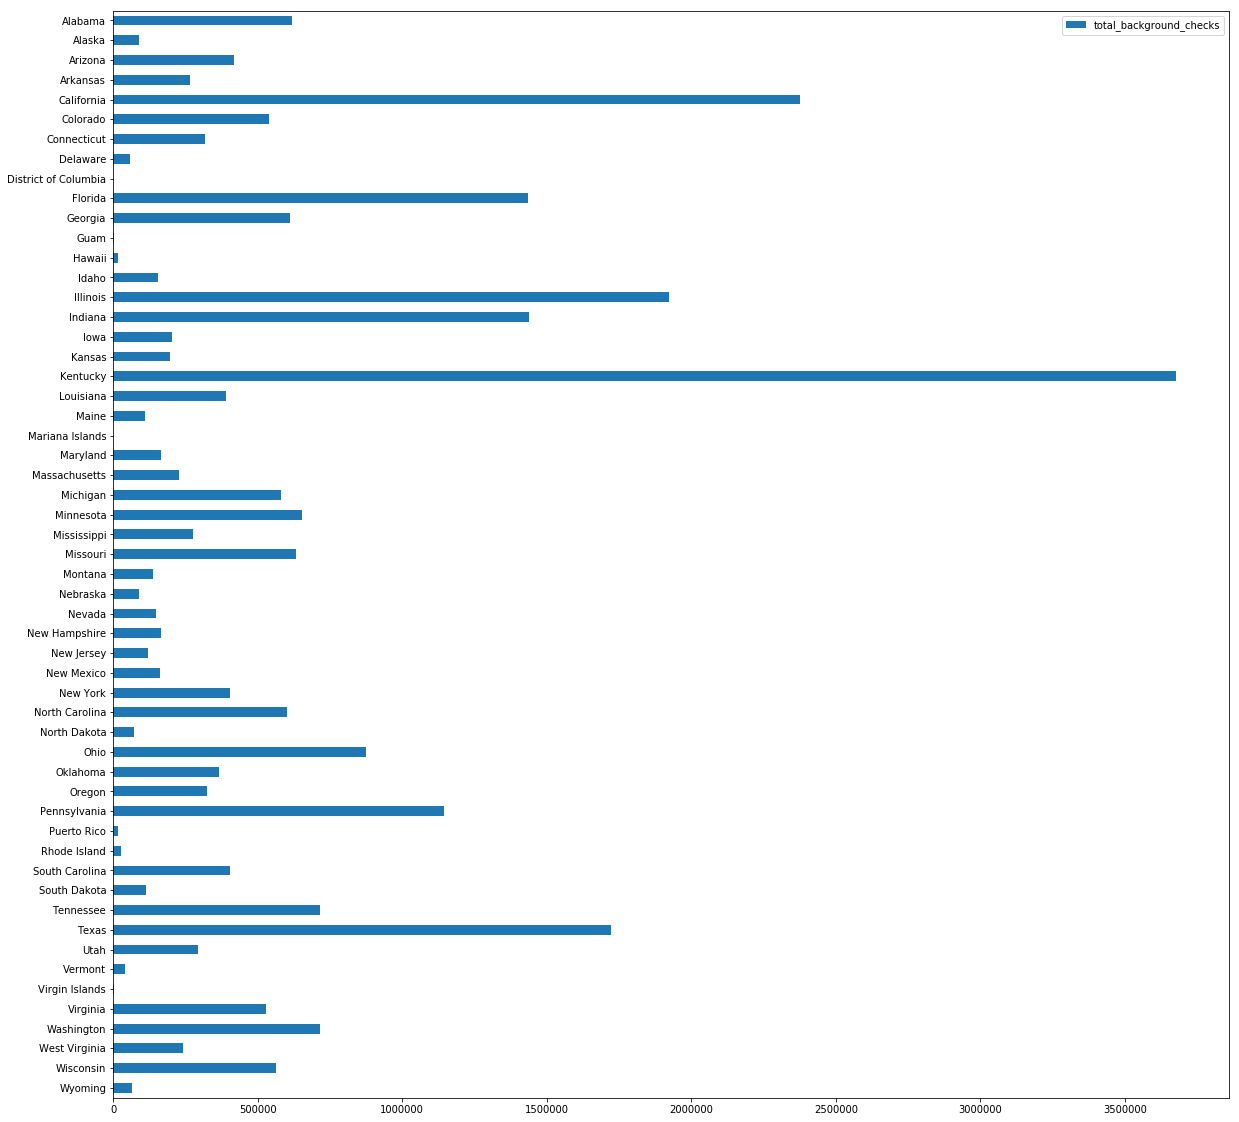

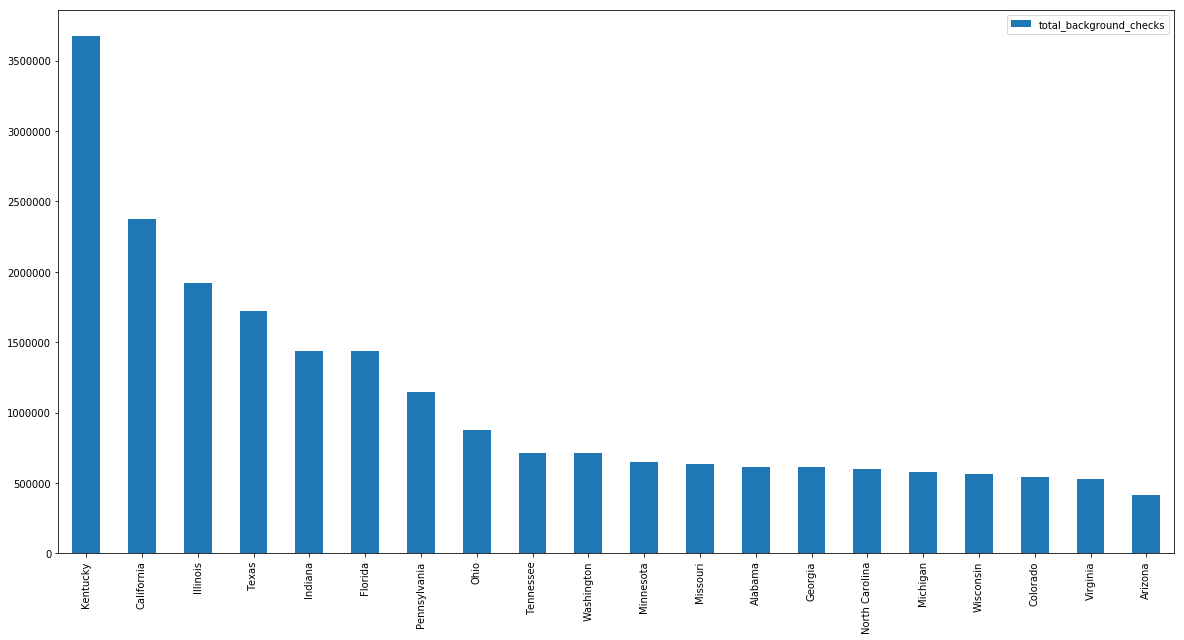

In [6]:
df_2016_total[::-1].plot(kind='barh', figsize=(20,20))
df_2016_total_sorted[:20].plot(kind='bar', figsize=(20,10))


In [7]:
df_2016_handgun = create_dataframe(df, 2016, 'handgun')
df_2016_handgun_sorted = df_2016_handgun.sort_values(0)[::-1]

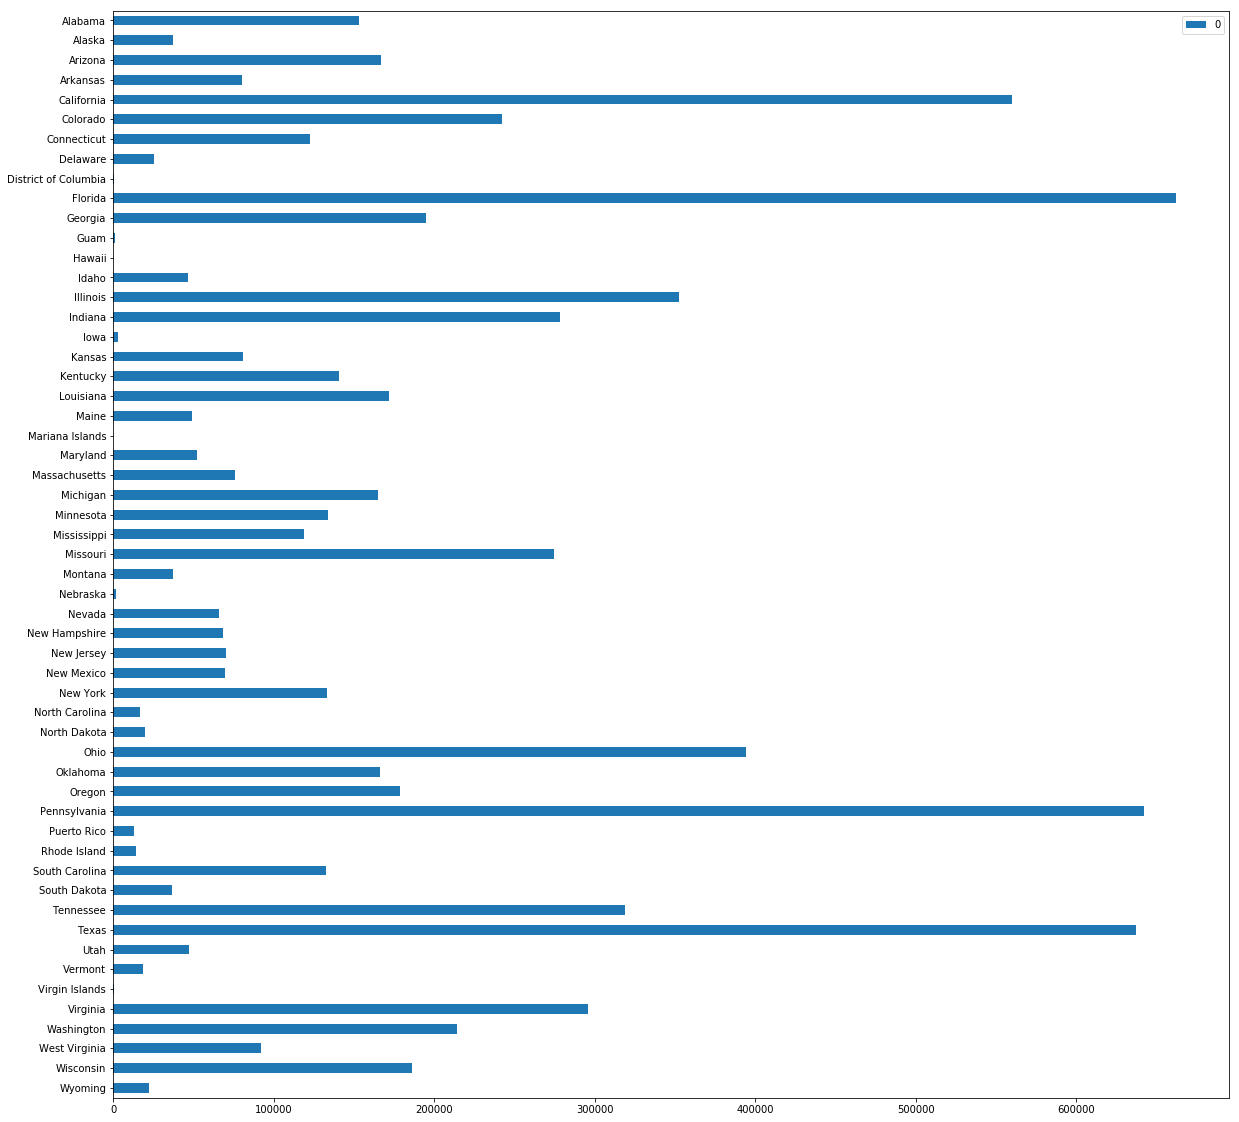

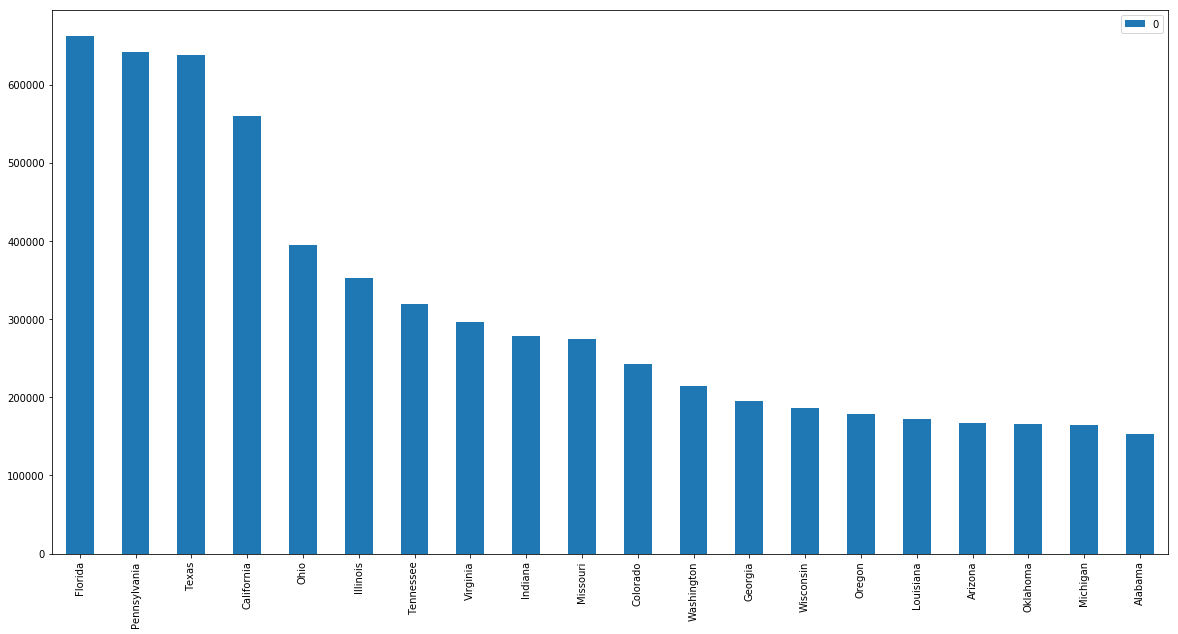

In [8]:
df_2016_handgun[::-1].plot(kind='barh', figsize=(20,20))
df_2016_handgun_sorted[:20].plot(kind='bar', figsize=(20,10))

In [9]:
df_2007_2016 = df[df['year'] >= 2007]
df_2007_2016 = df_2007_2016[df['year'] <= 2016]

/Users/DannyChan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [10]:
year_count_total = {}
year_count_handgun = {}
for i, row in df_2007_2016.iterrows():
    if row['year'] in year_count_total:
        year_count_total[row['year']] += int(row['totals'])
    else:
        year_count_total[row['year']] = int(row['totals'])
    if row['year'] in year_count_handgun:
        year_count_handgun[row['year']] += int(row['handgun'])
    else:
        year_count_handgun[row['year']] = int(row['handgun'])

      total_count
2007     11162272
2008     12692985
2009     13984953
2010     14320489
2011     16336732
2012     19463832
2013     20966704
2014     20860241
2015     23026288
2016     27425512


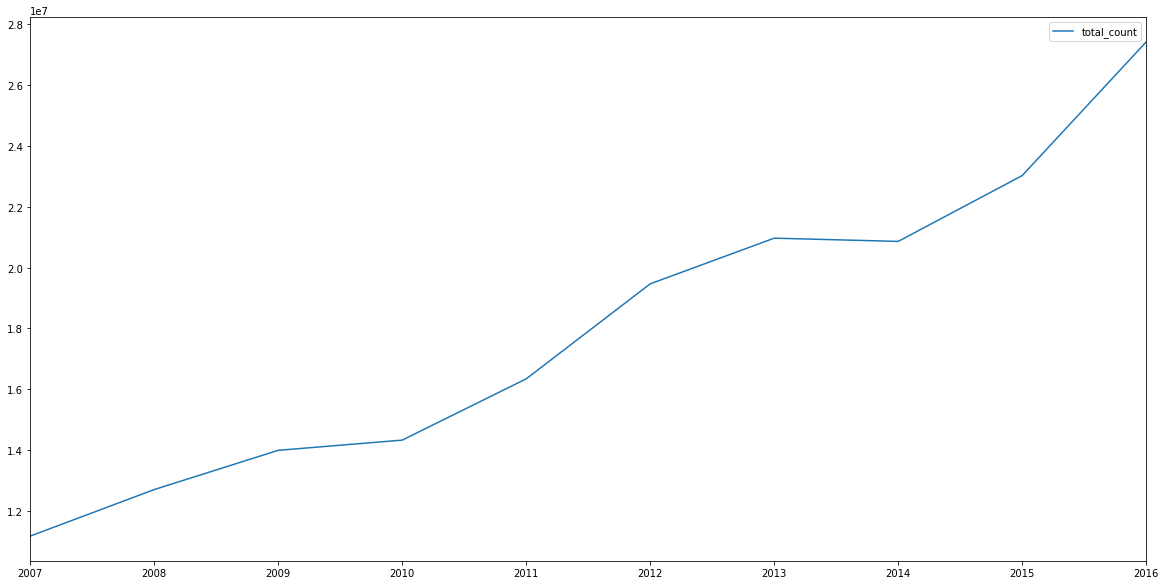

In [11]:
df_year_total = pd.DataFrame([year_count_total])
df_year_total = df_year_total.transpose()
df_year_total.columns = ['total_count']
print(df_year_total)
df_year_total.plot(figsize=(20,10))

      handgun_count
2007        2635629
2008        3331199
2009        3689604
2010        3678001
2011        4301389
2012        5682963
2013        6387502
2014        6199243
2015        7333808
2016        8085498


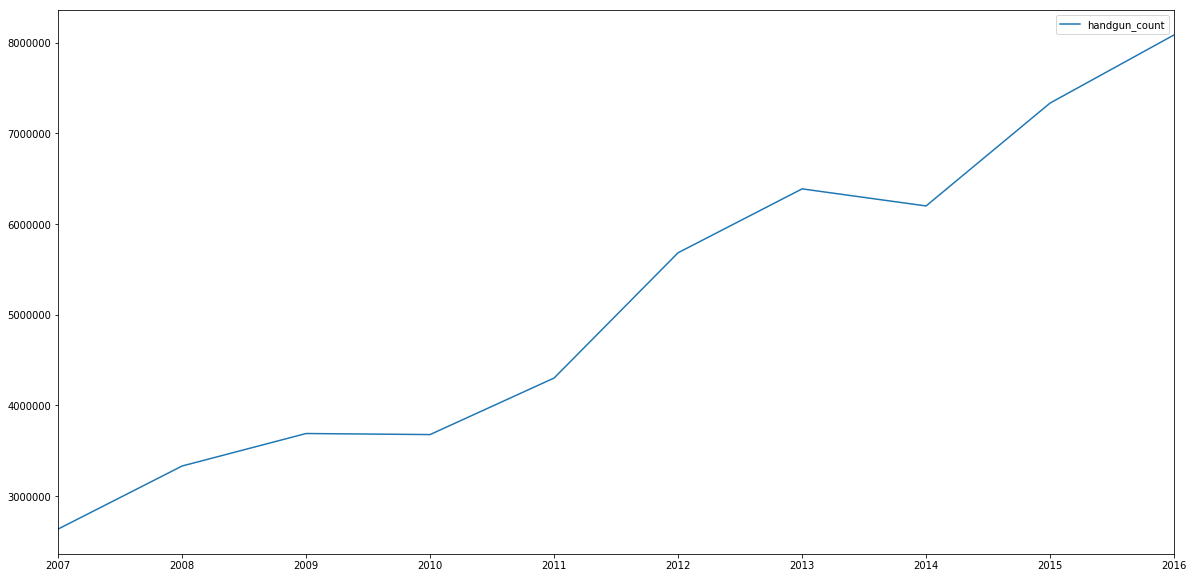

In [12]:
df_year_handgun = pd.DataFrame([year_count_handgun])
df_year_handgun = df_year_handgun.transpose()
df_year_handgun.columns = ['handgun_count']
print(df_year_handgun)
df_year_handgun.plot(figsize=(20,10))

In [13]:
df_shootings = pd.read_csv(open('shootings.csv'))
df_shootings.head()

,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations
0,"December 31, 2015",Louisiana,New Orleans,1900 block of Amelia Street,0,6,NaN
1,"December 27, 2015",Tennessee,Jackson,North Parkway,0,4,NaN
2,"December 26, 2015",Pennsylvania,Philadelphia,4210 Macalester St,0,4,NaN
3,"December 25, 2015",Florida,Jacksonville,Franklin and Odessa,0,4,NaN
4,"December 25, 2015",Alabama,Mobile,785 Schillinger Rd S,0,4,NaN


In [14]:
incident_count = {}
affected_count = {}
for i, row in df_shootings.iterrows():
    if row['State'] in incident_count:
        incident_count[row['State']] += 1
    else:
        incident_count[row['State']] = 1
        
    if row['State'] in affected_count:
        affected_count[row['State']] += (int(row['# Killed']) + int(row['# Injured']))
    else:
        affected_count[row['State']] = (int(row['# Killed']) + int(row['# Injured']))
 

In [15]:
df_incident = pd.DataFrame([incident_count]).transpose()
df_affected = pd.DataFrame([affected_count]).transpose()

In [16]:
df_incident.columns = ['# Incident']
df_affected.columns = ['# Affected']

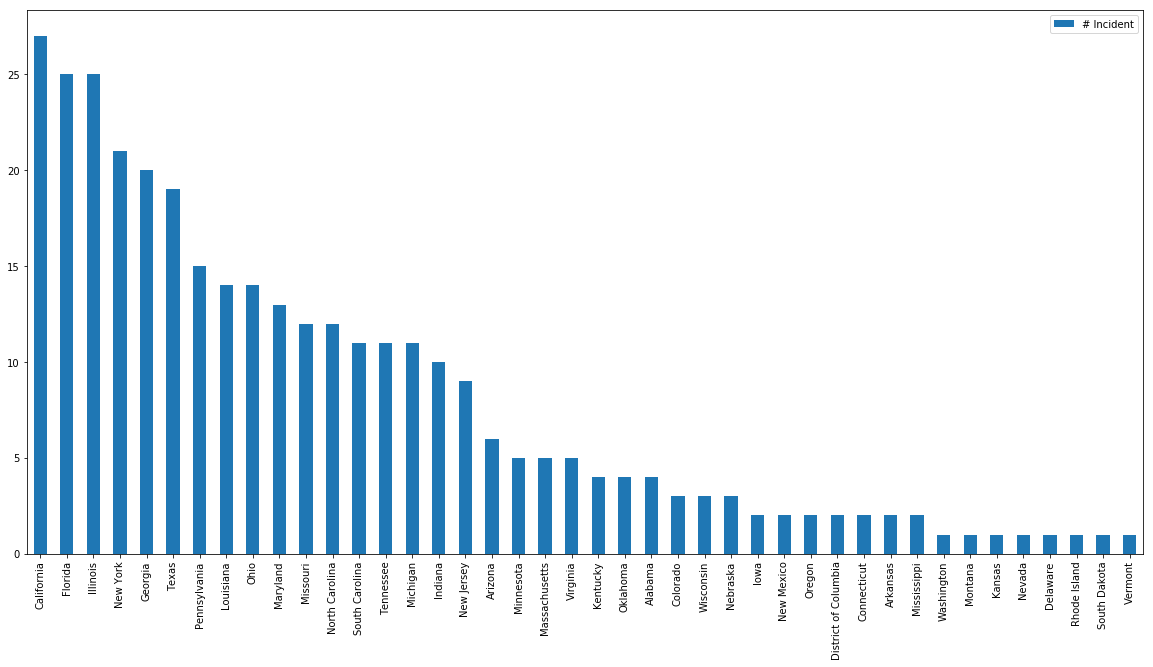

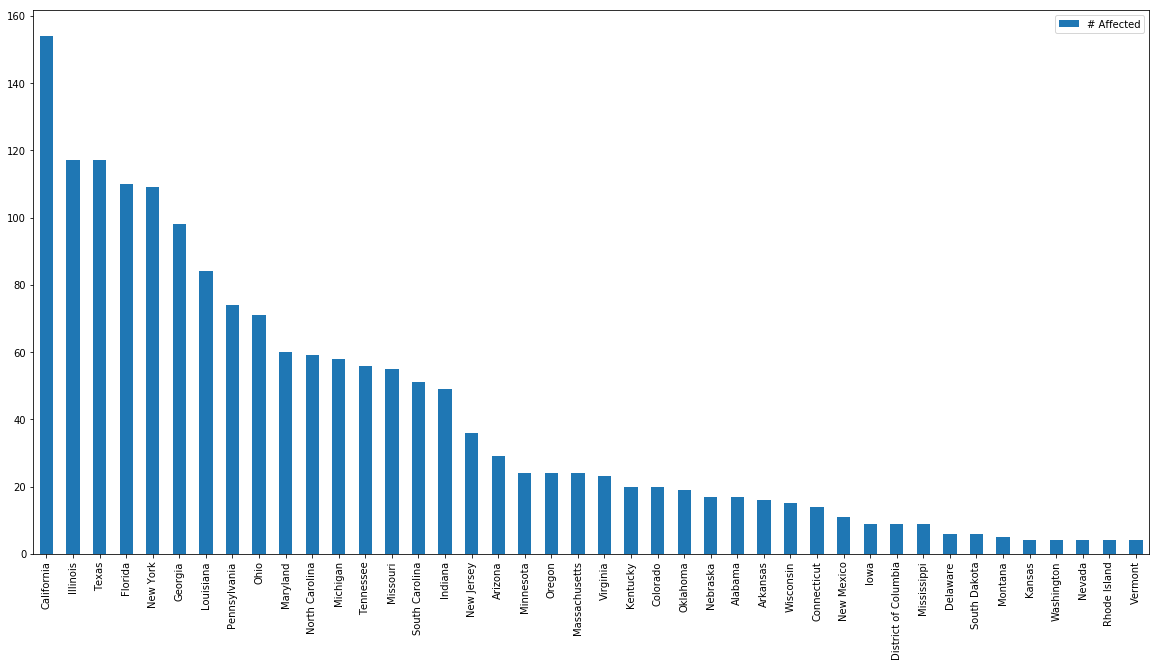

In [17]:
df_incident.sort_values('# Incident')[::-1].plot(kind='bar', figsize=(20,10))
df_affected.sort_values('# Affected')[::-1].plot(kind='bar', figsize=(20,10))

In [35]:
print(df_2016_total)
print(df_incident)

                      total_background_checks
Alabama                                616947
Alaska                                  87647
Arizona                                416279
Arkansas                               266014
California                            2377167
Colorado                               540514
Connecticut                            317692
Delaware                                59430
District of Columbia                      875
Florida                               1435340
Georgia                                612985
Guam                                     2123
Hawaii                                  16681
Idaho                                  156343
Illinois                              1924070
Indiana                               1436725
Iowa                                   202277
Kansas                                 196548
Kentucky                              3676847
Louisiana                              391869
Maine                             

In [36]:
df_2016_total_merge = pd.concat([df_2016_total, df_incident], axis=1)

In [38]:
df_2016_total_merge.fillna(0, inplace=True)
df_2016_total_merge

,total_background_checks,# Incident
Alabama,616947,4.0
Alaska,87647,0.0
Arizona,416279,6.0
Arkansas,266014,2.0
California,2377167,27.0
Colorado,540514,3.0
Connecticut,317692,2.0
Delaware,59430,1.0
District of Columbia,875,2.0
Florida,1435340,25.0


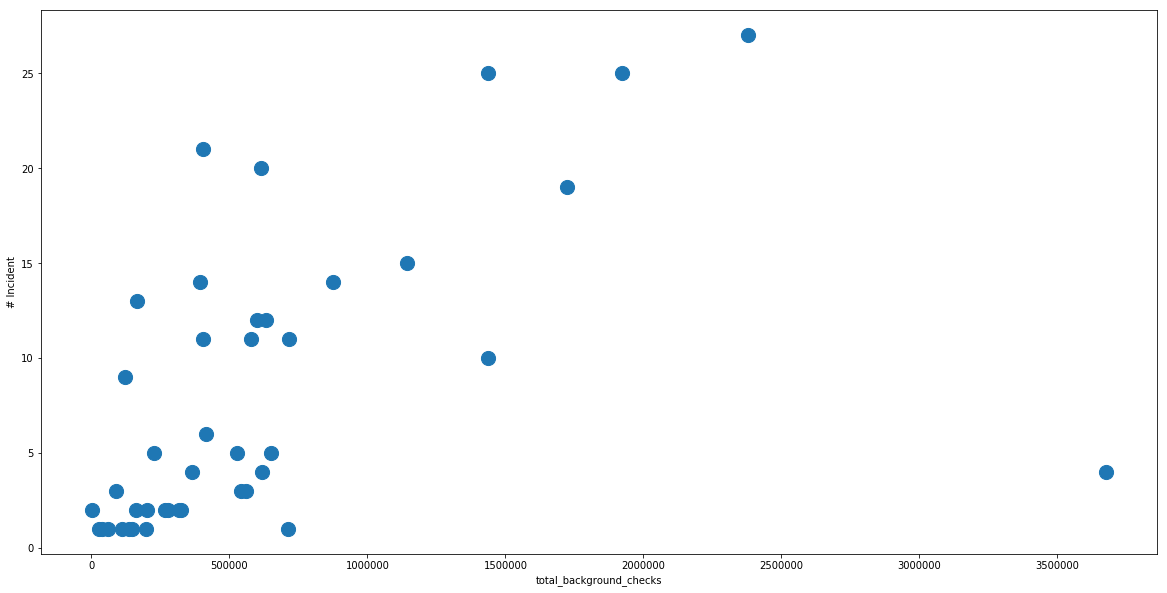

In [50]:
#df[df['year'] >= 2007]
df_2016_total_merge[df_2016_total_merge['# Incident'] > 0].plot(x='total_background_checks', y='# Incident', kind='scatter', figsize=(20,10), s=200)

In [52]:
import patsy
import statsmodels.api as sm

/Users/DannyChan/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [56]:
df_2016_total_merge.columns = ['total', 'incidents']
df_2016_total_merge.head()


,total,incidents
Alabama,616947,4.0
Alaska,87647,0.0
Arizona,416279,6.0
Arkansas,266014,2.0
California,2377167,27.0


In [64]:
df_2016_clean = df_2016_total_merge[df_2016_total_merge['incidents'] > 0]
print(df_2016_clean)
out, pred = patsy.dmatrices('incidents ~ total', df_2016_clean)
mod = sm.OLS(out, pred)
res = mod.fit()

                        total  incidents
Alabama                616947        4.0
Arizona                416279        6.0
Arkansas               266014        2.0
California            2377167       27.0
Colorado               540514        3.0
Connecticut            317692        2.0
Delaware                59430        1.0
District of Columbia      875        2.0
Florida               1435340       25.0
Georgia                612985       20.0
Illinois              1924070       25.0
Indiana               1436725       10.0
Iowa                   202277        2.0
Kansas                 196548        1.0
Kentucky              3676847        4.0
Louisiana              391869       14.0
Maryland               165367       13.0
Massachusetts          226212        5.0
Michigan               579605       11.0
Minnesota              651599        5.0
Mississippi            276161        2.0
Missouri               632319       12.0
Montana                136337        1.0
Nebraska        

In [62]:
print (res.summary())

                            OLS Regression Results                            
Dep. Variable:              incidents   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     14.53
Date:                Sun, 18 Mar 2018   Prob (F-statistic):           0.000467
Time:                        15:50:02   Log-Likelihood:                -137.88
No. Observations:                  42   AIC:                             279.8
Df Residuals:                      40   BIC:                             283.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.5240      1.356      3.337      0.0